# To Explore Unsupervised Machine Learning

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Internship_Assignments\GRIP\Iris.csv')

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
import matplotlib as plot

## Visualization of Data

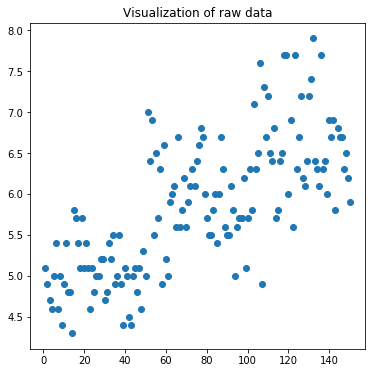

In [20]:
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title('Visualization of raw data');

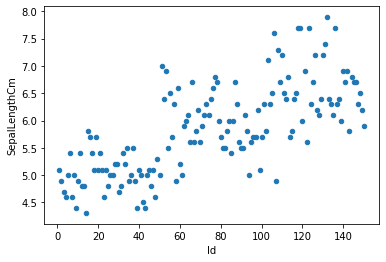

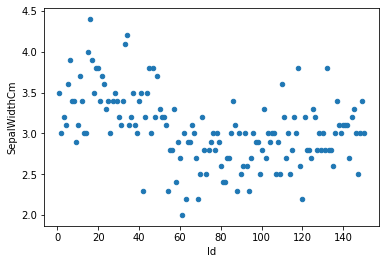

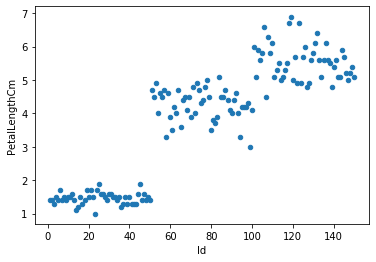

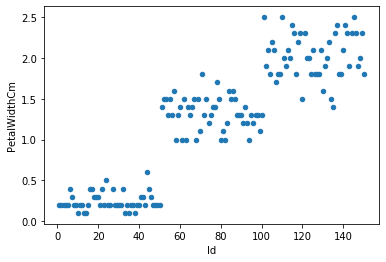

In [17]:
df.plot(kind='scatter',x='Id',y='SepalLengthCm')
df.plot(kind='scatter',x='Id',y='SepalWidthCm')
df.plot(kind='scatter',x='Id',y='PetalLengthCm')
df.plot(kind='scatter',x='Id',y='PetalWidthCm')

In [7]:
df.drop('Species',inplace=True,axis=1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [9]:
mms = MinMaxScaler()
mms.fit(df)
data_transformed = mms.transform(df)

In [10]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [11]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

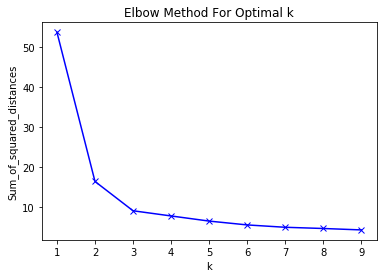

In [12]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## The optimum number of clusters is '3'

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
std_scalar = StandardScaler().fit_transform(df)
kmeans = KMeans(n_clusters = 3)
kmeans.fit(std_scalar)
pred = kmeans.predict(std_scalar)

In [15]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

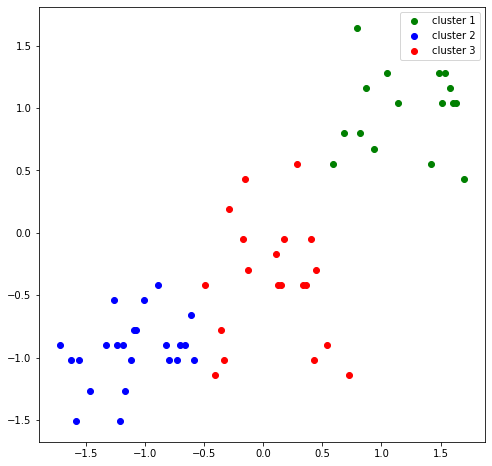

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))

plt.scatter(std_scalar[km.labels_ == 0, 0], std_scalar[km.labels_ == 0, 1],
            c='green', label='cluster 1')

plt.scatter(std_scalar[km.labels_ == 1, 0], std_scalar[km.labels_ == 1, 1],
            c='blue', label='cluster 2')

plt.scatter(std_scalar[km.labels_ == 2, 0], std_scalar[km.labels_ == 2, 1],
            c='red', label='cluster 3')

plt.legend()